## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv('ML_Data.csv')

In [3]:
#dtale.show(df, open_browser=True)

In [4]:
df.shape

(1616, 14)

In [5]:
df.head(2)

,Unnamed: 0,Name,Rating,Number of Ratings,Longitude,Latitude,neighborhood,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,Weighted Rating
0,0,فندق ميرا,3.7,1336.0,46.693985,24.701278,حي الملز,1,0,0,0,1,0,4943.2
1,1,مركز ماي كار لصيانة السيارات الاوروبية,3.5,2755.0,46.576437,24.851751,حي الملز,1,0,0,0,1,0,9642.5


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head(3)

,Name,Rating,Number of Ratings,Longitude,Latitude,neighborhood,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,Weighted Rating
0,فندق ميرا,3.7,1336.0,46.693985,24.701278,حي الملز,1,0,0,0,1,0,4943.2
1,مركز ماي كار لصيانة السيارات الاوروبية,3.5,2755.0,46.576437,24.851751,حي الملز,1,0,0,0,1,0,9642.5
2,Luthan Hotel and Spa,4.0,423.0,46.641709,24.706649,حي الملز,1,0,0,0,1,0,1692.0


In [8]:
df.dtypes

Name                  object
Rating               float64
Number of Ratings    float64
Longitude            float64
Latitude             float64
neighborhood          object
restaurant             int64
meal_takeaway          int64
meal_delivery          int64
cafe                   int64
food                   int64
bakery                 int64
Weighted Rating      float64
dtype: object

In [9]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
# position is alrady encoded

categorical_features = ['Name','neighborhood']
numeric_features = ['Rating', 'Number of Ratings', 'restaurant','meal_takeaway', 'meal_delivery', 'cafe', 'food', 'bakery',
       'Weighted Rating']

       

In [10]:

for i in categorical_features:
    print (df[i].value_counts())

Name
KFC                                                      174
Herfy                                                    149
McDonald's                                                76
Little Caesars Pizza! Pizza! !ليتل سيزرز بيتزا! بيتزا     68
Al Romansiah                                              63
                                                        ... 
لذة محشي                                                   1
مطعم ريف الشاورما                                          1
TO BE FIT مطعم صحي                                         1
RKN Pizza & Pastries Sakhna                                1
مطعم قارب البحار للمأكولات البحرية                         1
Name: count, Length: 214, dtype: int64
neighborhood
حي الندى         82
حي الملز         60
حي الربوة        60
حي الخليج        60
حي الأندلس       60
حي الحزم         60
حي نمار          60
حي ديراب         60
حي ظهرة نمار     60
هجرة وادي لبن    60
حي العارض        60
حي النرجس        60
حي الصحافة       60
حي الملقا   

In [11]:
for i in numeric_features:
    print(df[i].value_counts())


Rating
3.8    320
3.7    260
3.9    225
3.6    126
3.5    123
4.1    105
4.3    102
4.0     91
4.2     88
3.3     51
3.0     31
5.0     27
4.7     24
3.4     17
4.4      6
4.6      4
3.2      4
3.1      3
4.5      2
2.4      1
2.9      1
4.9      1
1.8      1
2.6      1
4.8      1
2.0      1
Name: count, dtype: int64
Number of Ratings
994.0     25
2198.0    25
827.0     25
639.0     24
4618.0    24
          ..
93.0       1
282.0      1
183.0      1
422.0      1
331.0      1
Name: count, Length: 205, dtype: int64
restaurant
1    1616
Name: count, dtype: int64
meal_takeaway
0    1454
1     162
Name: count, dtype: int64
meal_delivery
0    1391
1     225
Name: count, dtype: int64
cafe
0    1615
1       1
Name: count, dtype: int64
food
1    1616
Name: count, dtype: int64
bakery
0    1591
1      25
Name: count, dtype: int64
Weighted Rating
3777.2     25
8132.6     25
2729.1     25
6851.4     24
18010.2    24
           ..
3.0         1
736.3       1
850.2       1
854.1       1
66.3        1

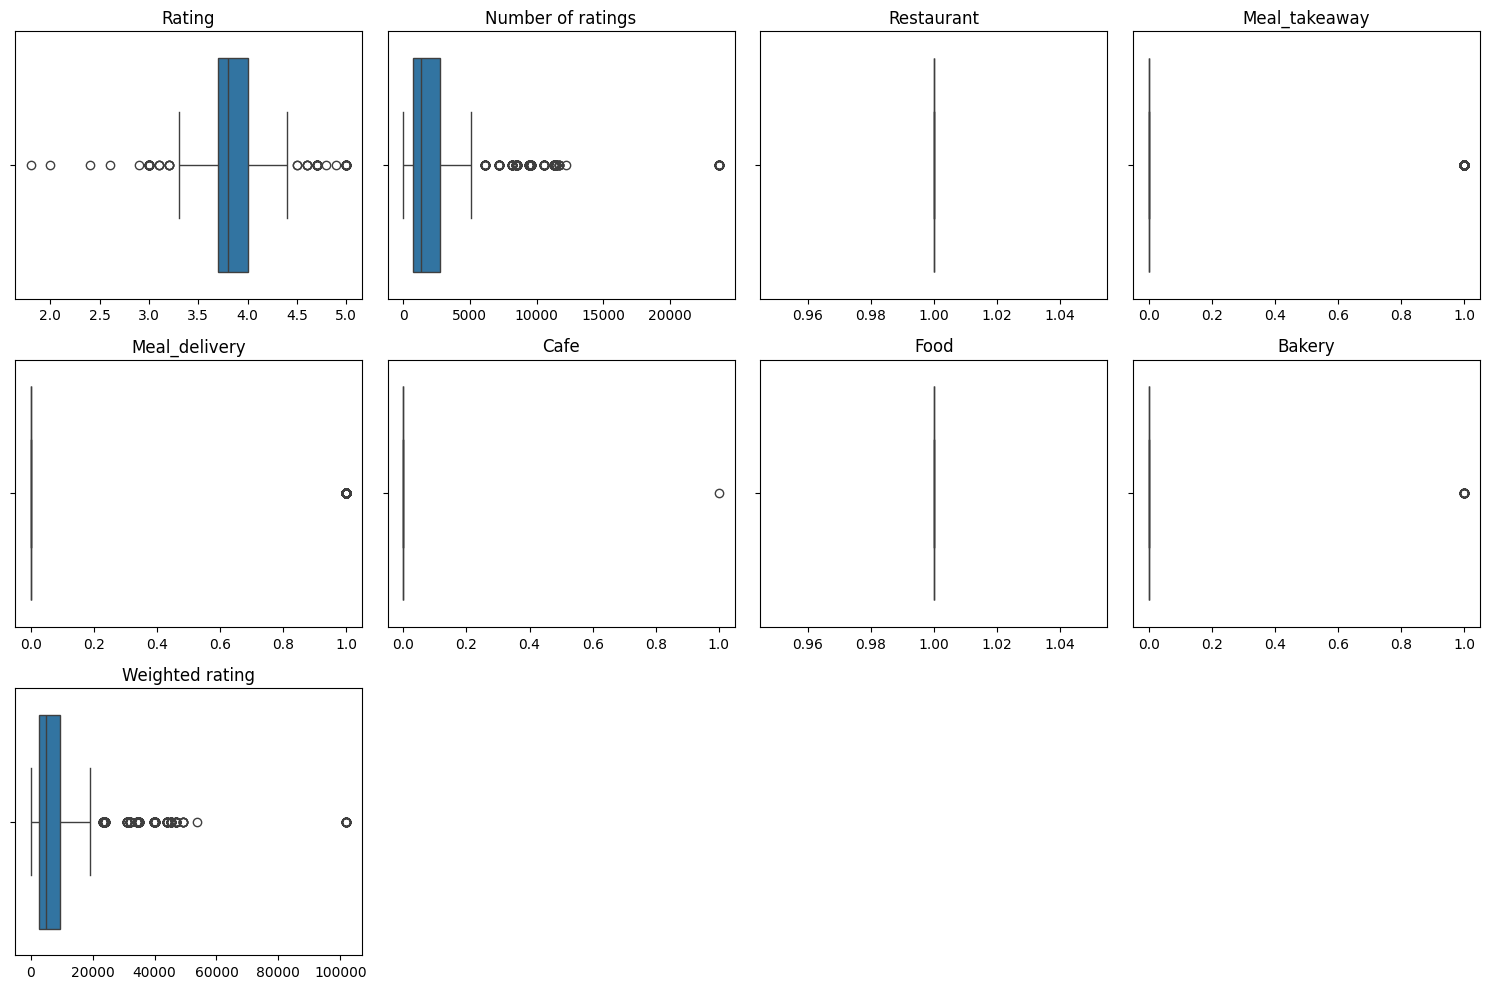

In [12]:
# boxplot for the feature 
num_features = len(numeric_features)

num_rows = math.ceil(num_features / 4)
num_cols = min(4, num_features)

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column])
    plt.title(column.capitalize())
    plt.xlabel('')

plt.tight_layout()
plt.show()


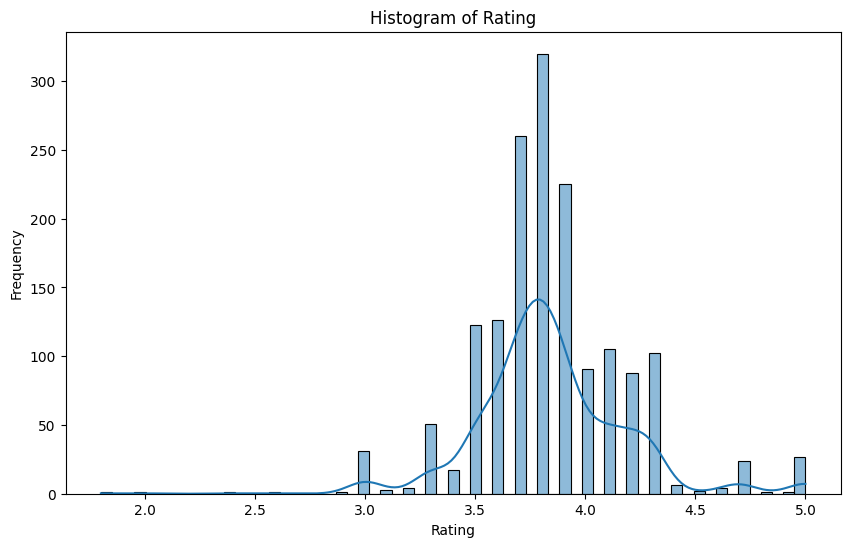

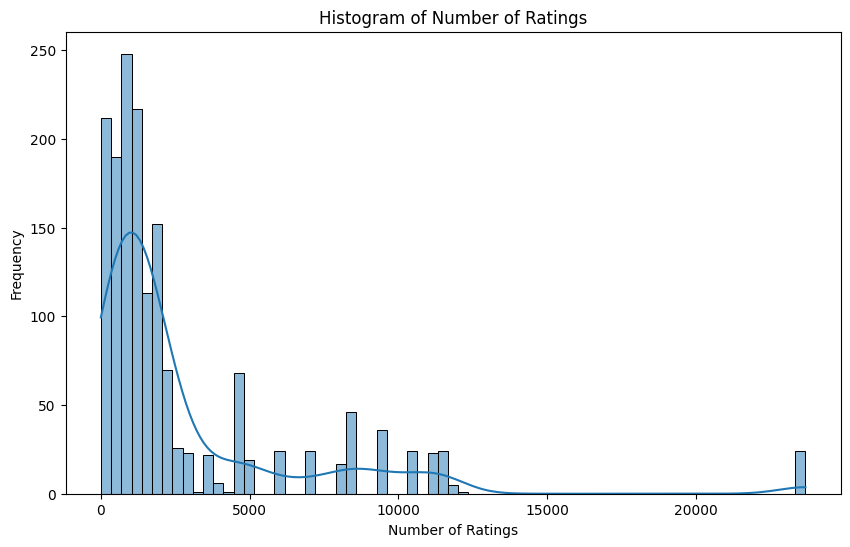

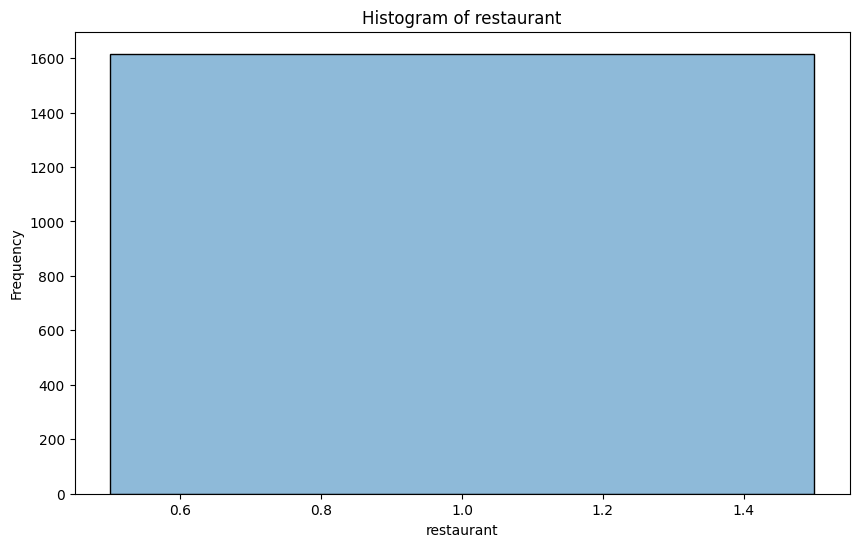

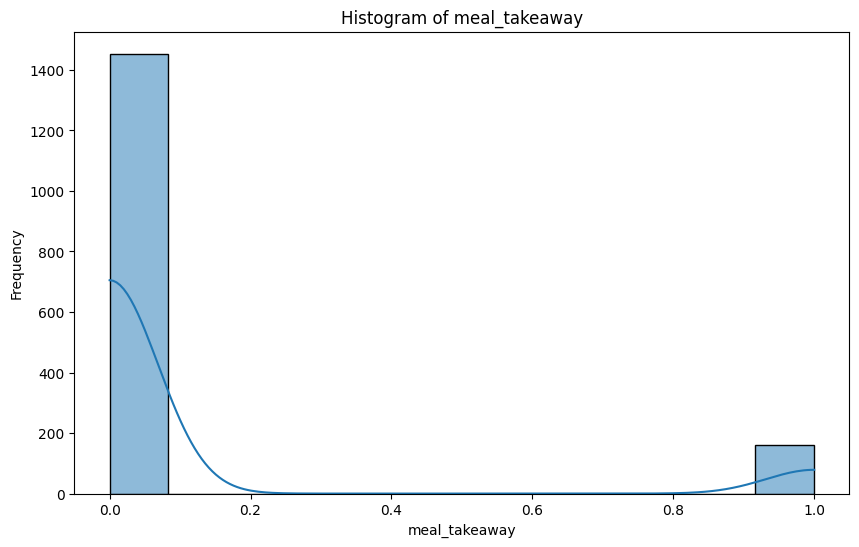

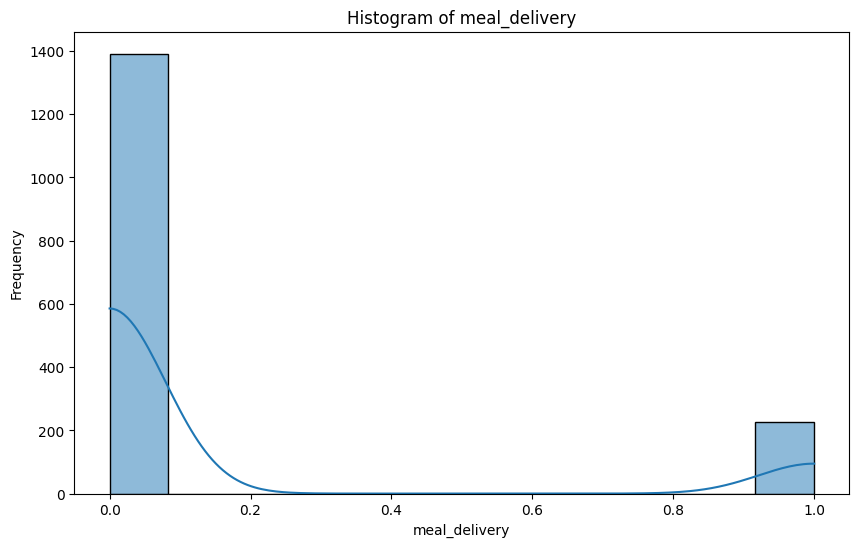

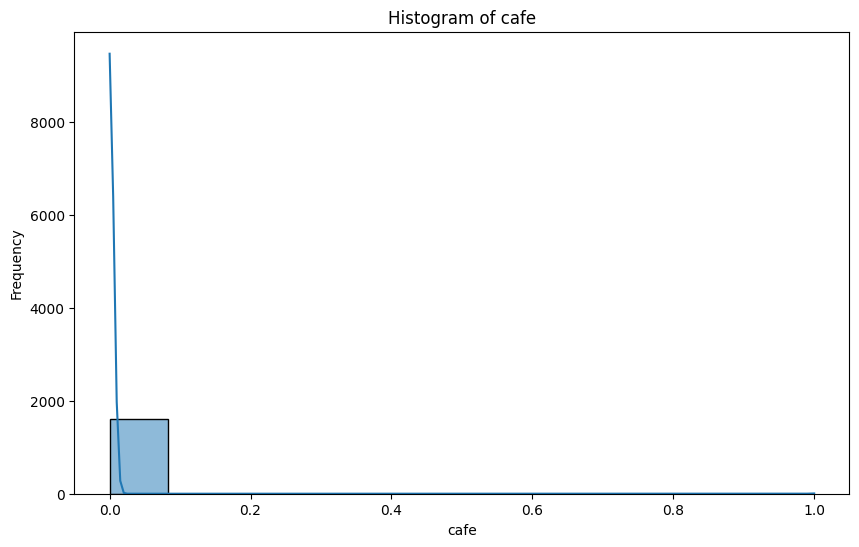

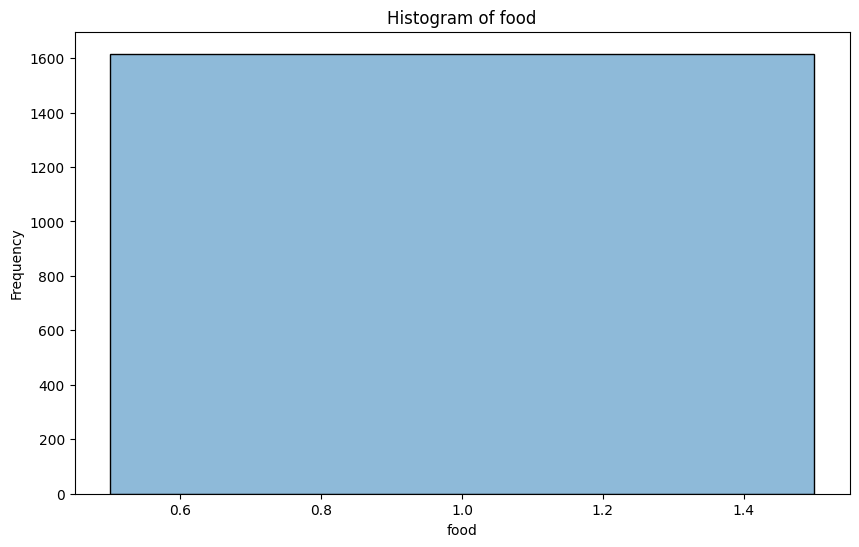

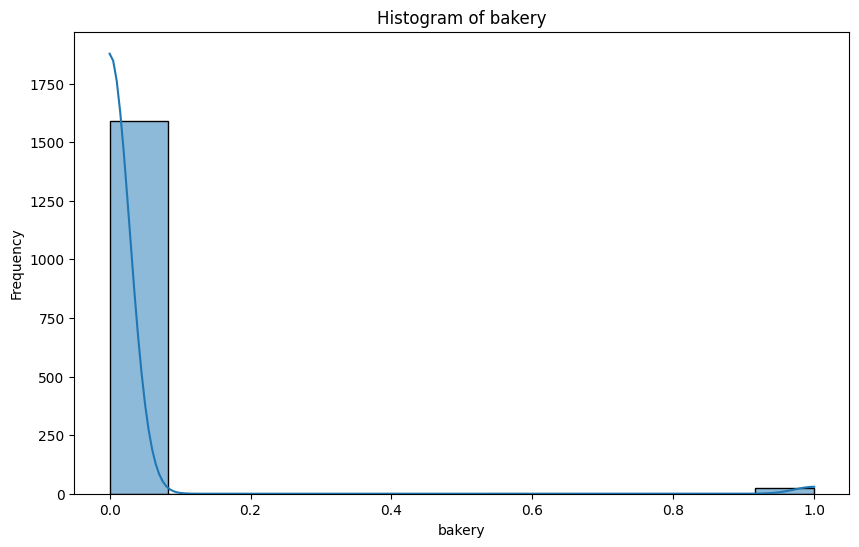

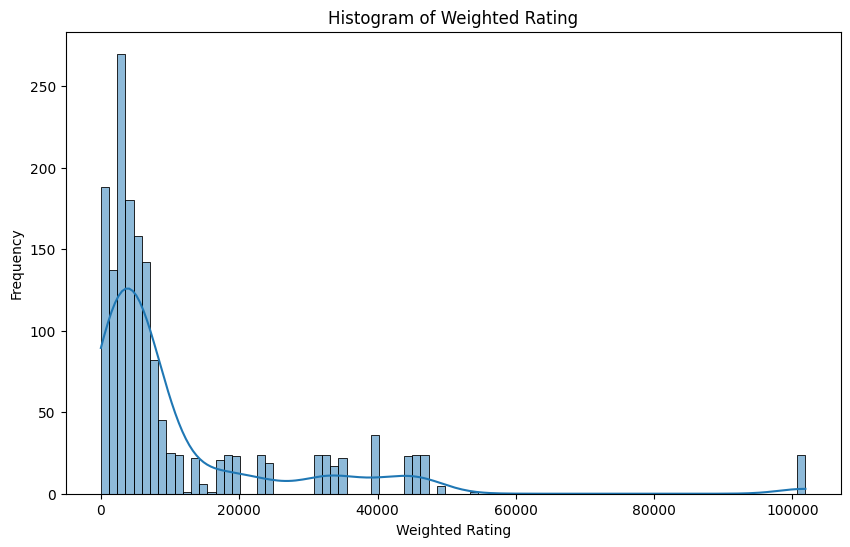

In [13]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)  # kde=True adds the Kernel Density Estimate line
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
df.shape

(1616, 13)

In [15]:
# df = df[df['age']<40]
# df = df[df["appearance"]<100]
# df = df[df["goals"]>0.5]
# df = df[df['award']<5]
# df = df[df["days_injured"]<407]
# df = df[df['games_injured']<60]
# df = df[df["minutes played"]<8000]



In [16]:
df.head(2)

,Name,Rating,Number of Ratings,Longitude,Latitude,neighborhood,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,Weighted Rating
0,فندق ميرا,3.7,1336.0,46.693985,24.701278,حي الملز,1,0,0,0,1,0,4943.2
1,مركز ماي كار لصيانة السيارات الاوروبية,3.5,2755.0,46.576437,24.851751,حي الملز,1,0,0,0,1,0,9642.5


In [17]:

fig = px.histogram(df, x='Rating', nbins=50, title='Histogram of Rating')

fig.show()


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [18]:
df.head(2)

,Name,Rating,Number of Ratings,Longitude,Latitude,neighborhood,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,Weighted Rating
0,فندق ميرا,3.7,1336.0,46.693985,24.701278,حي الملز,1,0,0,0,1,0,4943.2
1,مركز ماي كار لصيانة السيارات الاوروبية,3.5,2755.0,46.576437,24.851751,حي الملز,1,0,0,0,1,0,9642.5


In [19]:
categorical_features

['Name', 'neighborhood']

In [20]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [21]:
df.shape

(1616, 252)

In [22]:
print(df.columns.tolist()) 


['Rating', 'Number of Ratings', 'Longitude', 'Latitude', 'restaurant', 'meal_takeaway', 'meal_delivery', 'cafe', 'food', 'bakery', 'Weighted Rating', 'Name_Al Dawadhmi', 'Name_Al Jalab Restaurant', 'Name_Al Nafoura Restaurant', 'Name_Al Romansiah', 'Name_Al Romansiah Restaurant - Al Nasseem District', 'Name_Al Saudi Restaurant', 'Name_Al Tazaj', 'Name_Al-Kef Al-Dhahbi Restaurant', 'Name_Al-Saudi Restaurant', 'Name_Al-Tazaj', 'Name_Anab roman restaurant', 'Name_Aziza Al Bukhari Restaurant - best restaurant in town', 'Name_BOOFIAH RESTAURANT', 'Name_Bait Almeena Restaurant', 'Name_Bait ul bokhari', 'Name_Bangladesh restaurant বাংলাদেশ হোটেলে', 'Name_Broast Line', 'Name_Burger King - Al Quds', 'Name_Burger King - Bin Turkey', 'Name_Burger King - Exit 28', 'Name_Burger King - Exit 8 Dammam Rd', 'Name_Burger King - Ghernata', 'Name_Burger King - Rawdah', 'Name_Burger King - Riyadh Gallery 2', 'Name_Burger Roma', 'Name_Burgerizzr', 'Name_Camp Messhall', 'Name_Casa Pasta', 'Name_Cheese Restau

In [23]:
df.head(2)

,Rating,Number of Ratings,Longitude,Latitude,restaurant,meal_takeaway,meal_delivery,cafe,food,bakery,...,neighborhood_حي النرجس,neighborhood_حي النهضة,neighborhood_حي الوزارات,neighborhood_حي الياسمين,neighborhood_حي جرير,neighborhood_حي حطين,neighborhood_حي ديراب,neighborhood_حي ظهرة نمار,neighborhood_حي نمار,neighborhood_هجرة وادي لبن
0,3.7,1336.0,46.693985,24.701278,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,3.5,2755.0,46.576437,24.851751,1,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


# FOR K-MEANS

In [24]:
# Calculate the 35th and 75th percentiles of the Rating
p35 = df['Rating'].quantile(0.35)
p75 = df['Rating'].quantile(0.75)

# Function to categorize Ratings
def categorize_Rating(Rating):
    if Rating > 4.3:
        return 'good'
    elif Rating > 3.3:
        return 'medium'
    else:
        return 'bad'

# Apply the function to create a new column
df['Rating_category'] = df['Rating'].apply(categorize_Rating)

# Verify the distribution of the new categories
print(df['Rating_category'].value_counts())

# Optionally, drop the original 'Rating' column
df.drop('Rating', axis=1, inplace=True)


Rating_category
medium    1457
bad         94
good        65
Name: count, dtype: int64


In [25]:
p35 ,p75

(3.7, 4.0)

In [26]:
df['Rating_category'] 

0       medium
1       medium
2       medium
3          bad
4       medium
         ...  
1611    medium
1612    medium
1613    medium
1614    medium
1615    medium
Name: Rating_category, Length: 1616, dtype: object

In [27]:
encoder = LabelEncoder()
#pcvc_encoded == players current value category encoded
df['Rating_category_encoder'] = encoder.fit_transform(df['Rating_category'])  

#### 3. Feature selection

In [28]:
df.drop('Rating_category',axis=1,inplace=True)

In [29]:
corrl = df.corr(numeric_only=True)
#print(corrl['current_value'].sort_values(ascending=False))

print(corrl['Rating_category_encoder'].sort_values(ascending=False))

Rating_category_encoder       1.000000
Longitude                     0.236563
Latitude                      0.168238
Number of Ratings             0.158519
Weighted Rating               0.150022
                                ...   
Name_Hardee's                -0.443406
Name_Al Nafoura Restaurant   -0.444449
Name_Dining Hall             -0.454151
restaurant                         NaN
food                               NaN
Name: Rating_category_encoder, Length: 252, dtype: float64


In [30]:
# Set the correlation threshold
threshold = 0.12

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = corrl[abs(corrl['Rating_category_encoder']) > threshold]['Rating_category_encoder'].index
selected_features

Index(['Number of Ratings', 'Longitude', 'Latitude', 'meal_delivery',
       'Weighted Rating', 'Name_Al Nafoura Restaurant', 'Name_Dining Hall',
       'Name_Fairmont Riyadh', 'Name_Hardee's', 'neighborhood_حي السليمانية',
       'neighborhood_حي النهضة', 'Rating_category_encoder'],
      dtype='object')

In [31]:
selected_features = ['Number of Ratings', 'Longitude', 'Latitude', 'meal_delivery',
       'Weighted Rating', 'Name_Al Nafoura Restaurant', 'Name_Dining Hall',
       'Name_Fairmont Riyadh', "Name_Hardee's", 'neighborhood_حي السليمانية',
       'neighborhood_حي النهضة', 'Rating_category_encoder']

In [32]:
df = df[selected_features]
df.head()

,Number of Ratings,Longitude,Latitude,meal_delivery,Weighted Rating,Name_Al Nafoura Restaurant,Name_Dining Hall,Name_Fairmont Riyadh,Name_Hardee's,neighborhood_حي السليمانية,neighborhood_حي النهضة,Rating_category_encoder
0,1336.0,46.693985,24.701278,0,4943.2,False,False,False,False,False,False,2
1,2755.0,46.576437,24.851751,0,9642.5,False,False,False,False,False,False,2
2,423.0,46.641709,24.706649,0,1692.0,False,False,False,False,False,False,2
3,27.0,46.619655,24.720989,0,81.0,False,True,False,False,False,False,0
4,1721.0,46.706125,24.704821,0,6884.0,False,False,False,False,False,False,2


#### 4. Prepare train and test data

In [33]:
# Prepare data
X = df.drop(['Rating_category_encoder'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X.shape

(1616, 11)

## Buliding the Model

In [35]:
wcss = []
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


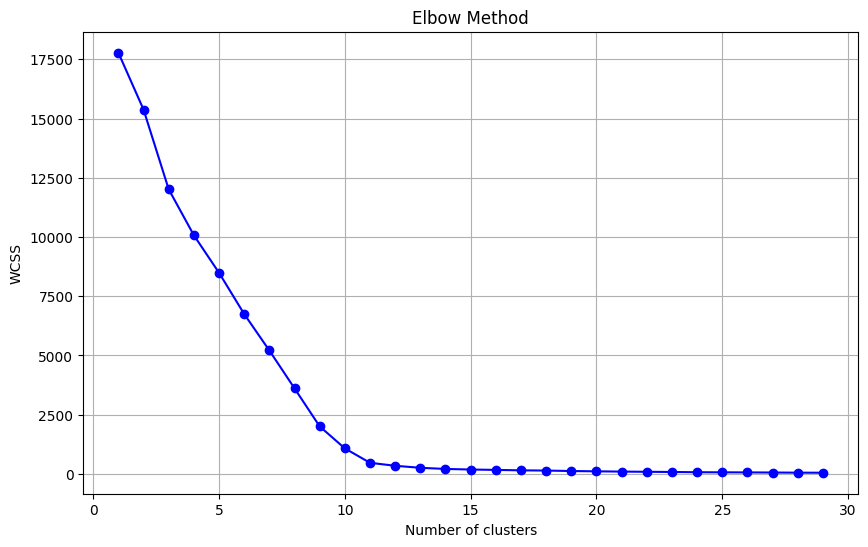

In [36]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [37]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 8 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Model

In [38]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Evaluating the Model 

In [39]:
X.head(2)

,Number of Ratings,Longitude,Latitude,meal_delivery,Weighted Rating,Name_Al Nafoura Restaurant,Name_Dining Hall,Name_Fairmont Riyadh,Name_Hardee's,neighborhood_حي السليمانية,neighborhood_حي النهضة
0,1336.0,46.693985,24.701278,0,4943.2,False,False,False,False,False,False
1,2755.0,46.576437,24.851751,0,9642.5,False,False,False,False,False,False


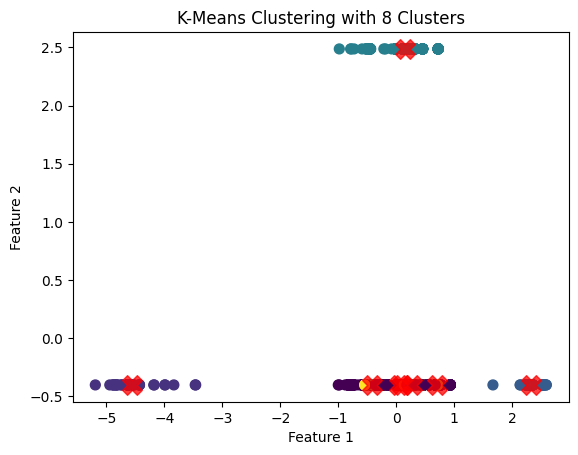

In [40]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [41]:
X['kmeans'] = y_pred

In [42]:
X['kmeans'].value_counts()

kmeans
0    995
3    225
7    224
2     54
1     52
4     24
5     23
6     19
Name: count, dtype: int64

In [43]:
X[X['kmeans']==0]

,Number of Ratings,Longitude,Latitude,meal_delivery,Weighted Rating,Name_Al Nafoura Restaurant,Name_Dining Hall,Name_Fairmont Riyadh,Name_Hardee's,neighborhood_حي السليمانية,neighborhood_حي النهضة,kmeans
0,1336.0,46.693985,24.701278,0,4943.2,False,False,False,False,False,False,0
1,2755.0,46.576437,24.851751,0,9642.5,False,False,False,False,False,False,0
2,423.0,46.641709,24.706649,0,1692.0,False,False,False,False,False,False,0
4,1721.0,46.706125,24.704821,0,6884.0,False,False,False,False,False,False,0
8,2198.0,46.737091,24.595064,0,8132.6,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1610,872.0,46.750084,24.779546,0,3139.2,False,False,False,False,False,False,0
1612,1081.0,46.797511,24.780961,0,4107.8,False,False,False,False,False,False,0
1613,1825.0,46.764410,24.732753,0,6387.5,False,False,False,False,False,False,0
1614,1370.0,46.762265,24.735643,0,5069.0,False,False,False,False,False,False,0


<Axes: xlabel='Weighted Rating', ylabel='neighborhood_حي السليمانية'>

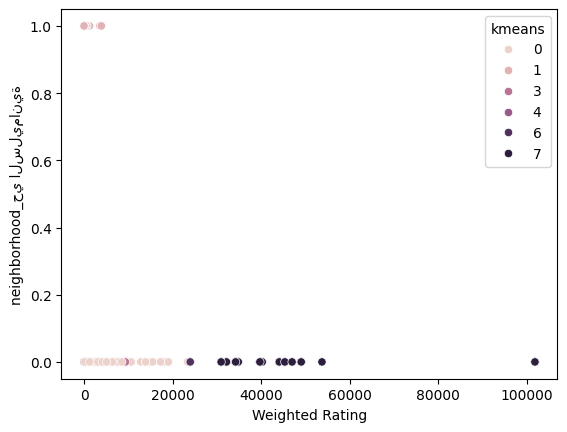

In [44]:
sns.scatterplot(data = X , x = 'Weighted Rating', y = 'neighborhood_حي السليمانية', hue = 'kmeans')

In [45]:
X.columns

Index(['Number of Ratings', 'Longitude', 'Latitude', 'meal_delivery',
       'Weighted Rating', 'Name_Al Nafoura Restaurant', 'Name_Dining Hall',
       'Name_Fairmont Riyadh', 'Name_Hardee's', 'neighborhood_حي السليمانية',
       'neighborhood_حي النهضة', 'kmeans'],
      dtype='object')

<Axes: xlabel='Number of Ratings', ylabel='meal_delivery'>

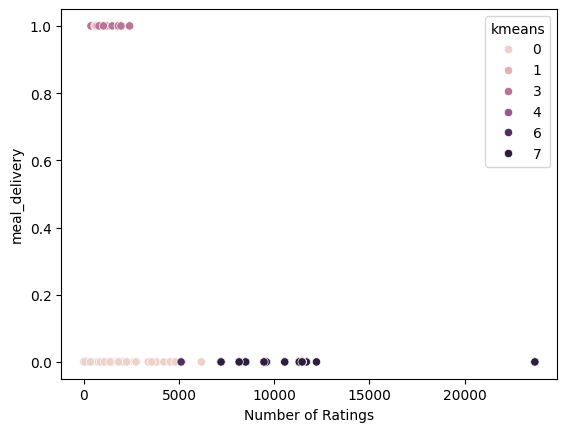

In [46]:
sns.scatterplot(data = X , x = 'Number of Ratings', y = 'meal_delivery', hue = 'kmeans')

<Axes: xlabel='Number of Ratings', ylabel='Name_Al Nafoura Restaurant'>

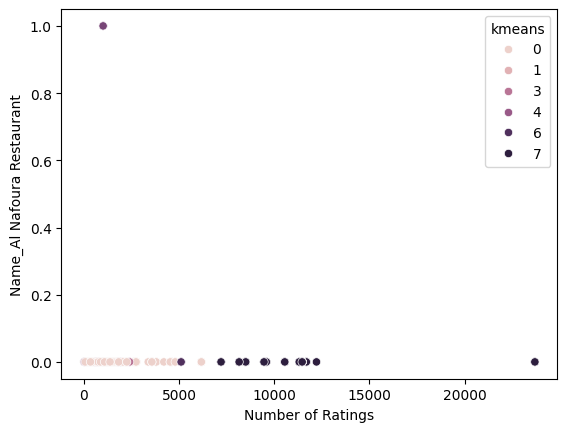

In [47]:
sns.scatterplot(data = X , x = 'Number of Ratings', y = 'Name_Al Nafoura Restaurant', hue = 'kmeans')

<Axes: xlabel='Weighted Rating', ylabel="Name_Hardee's">

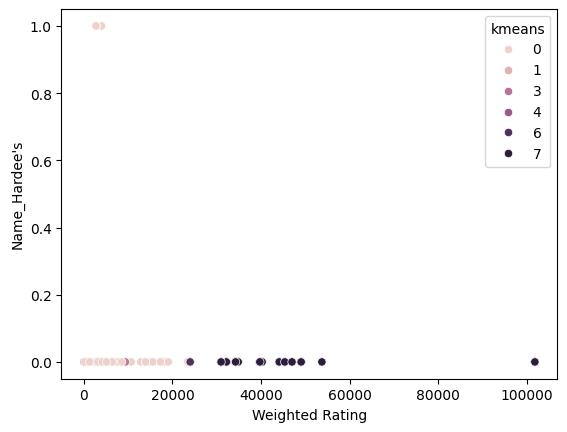

In [48]:
sns.scatterplot(data = X , x = 'Weighted Rating', y = "Name_Hardee's", hue = 'kmeans')

In [49]:
df.dtypes

Number of Ratings             float64
Longitude                     float64
Latitude                      float64
meal_delivery                   int64
Weighted Rating               float64
Name_Al Nafoura Restaurant       bool
Name_Dining Hall                 bool
Name_Fairmont Riyadh             bool
Name_Hardee's                    bool
neighborhood_حي السليمانية       bool
neighborhood_حي النهضة           bool
Rating_category_encoder         int32
dtype: object

In [50]:
 
import joblib
joblib.dump(model, 'Models/K-Means.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')

['Models/scaler.joblib']